In [1]:
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import scipy.constants as cs
import uncertainties
from uncertainties import ufloat

$$S_{V_J} = \frac{V_J^2}{B_N} = 4 k T R_L$$
This is the equation that relations the resistance to the noise. We measured in the voltage noise spectral density which is $$\sqrt{S_{V_J}$$ in nV/sqrt(Hz). We expect the resistance to be proportional to the noise squared, but we're not sure we see that. Thus we wanted to graph our data. We took our data after averaging 200 times at 3 different frequences for 8 different resistors

In [2]:
import math

R = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]

def calculate_noise(r):
    return math.sqrt(r / 50) # given that noise at 50 ohms is around 1 nV

expected_noises = [calculate_noise(r) for r in R]  # Using list comprehension

# Alternatively, using map:
# noises = list(map(calculate_noise, R))

print(expected_noises)


[1.0, 1.4142135623730951, 3.1622776601683795, 4.47213595499958, 10.0, 14.142135623730951, 31.622776601683793, 44.721359549995796]


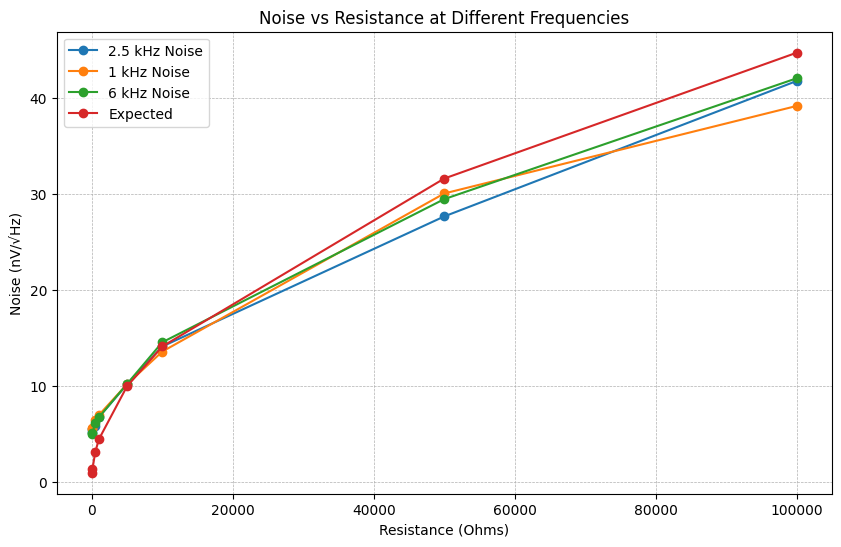

In [3]:
# Data
frequencies = [2.5, 1, 6]  # in kHz
resistances = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]  # in Ohms
noise_1_kHz = [5.63,5.57, 6.48,7.00,10.21,13.61,30.07,39.18]
noise_2_5_kHz = [5.53,5.29,5.90,6.77,10.19,14.14,27.68,41.78]
noise_6_kHz = [4.99, 5.18, 6.15,6.77,10.24,14.58,29.48,42.06]
expected_noise = [1.0, 1.4142135623730951, 3.1622776601683795, 4.47213595499958, 10.0, 14.142135623730951, 31.622776601683793, 44.721359549995796]

# Plot
plt.figure(figsize=(10, 6))

plt.plot(resistances, noise_2_5_kHz, marker='o', label='2.5 kHz Noise')
plt.plot(resistances, noise_1_kHz, marker='o', label='1 kHz Noise')
plt.plot(resistances, noise_6_kHz, marker='o', label='6 kHz Noise')
plt.plot(resistances, expected_noise, marker='o', label='Expected')

# Log scale for resistances
plt.xscale('linear')

# Labels and title
plt.xlabel('Resistance (Ohms)')
plt.ylabel('Noise (nV/√Hz)')
plt.title('Noise vs Resistance at Different Frequencies')
plt.legend()

# Grid and show plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


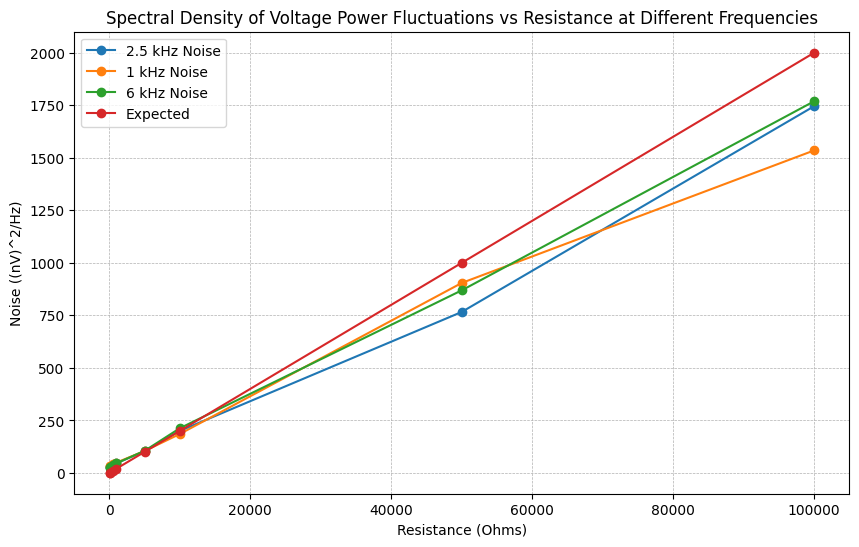

In [4]:
# Data
frequencies = [2.5, 1, 6]  # in kHz
resistances = [50, 100, 500, 1000, 5000, 10000, 50000, 100000]  # in Ohms
noise_1_kHz = [5.63,5.57, 6.48,7.00,10.21,13.61,30.07,39.18] # in nV/sqrt(Hz)
noise_2_5_kHz = [5.53,5.29,5.90,6.77,10.19,14.14,27.68,41.78]
noise_6_kHz = [4.99, 5.18, 6.15,6.77,10.24,14.58,29.48,42.06]
expected_noise = [1.0, 1.4142135623730951, 3.1622776601683795, 4.47213595499958, 10.0, 14.142135623730951, 31.622776601683793, 44.721359549995796]


# Plot
plt.figure(figsize=(10, 6))

# Compute noise squared
noise_squared_2_5_kHz = np.array(noise_2_5_kHz) ** 2
noise_squared_1_kHz = np.array(noise_1_kHz) ** 2
noise_squared_6_kHz = np.array(noise_6_kHz) ** 2
noise_squared_expected = np.array(expected_noise) ** 2

plt.plot(resistances, noise_squared_2_5_kHz, marker='o', label='2.5 kHz Noise')
plt.plot(resistances, noise_squared_1_kHz, marker='o', label='1 kHz Noise')
plt.plot(resistances, noise_squared_6_kHz, marker='o', label='6 kHz Noise')
plt.plot(resistances, noise_squared_expected, marker='o', label='Expected')

# Log scale for resistances
plt.xscale('linear')

# Labels and title
plt.xlabel('Resistance (Ohms)')
plt.ylabel('Noise ((nV)^2/Hz)')
plt.title('Spectral Density of Voltage Power Fluctuations vs Resistance at Different Frequencies')
plt.legend()

# Grid and show plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


1 kHz Noise Squared: slope = 0.0154, intercept = 39.1942
2.5 kHz Noise Squared: slope = 0.0168, intercept = 19.1453
6 kHz Noise Squared: slope = 0.0173, intercept = 25.2772


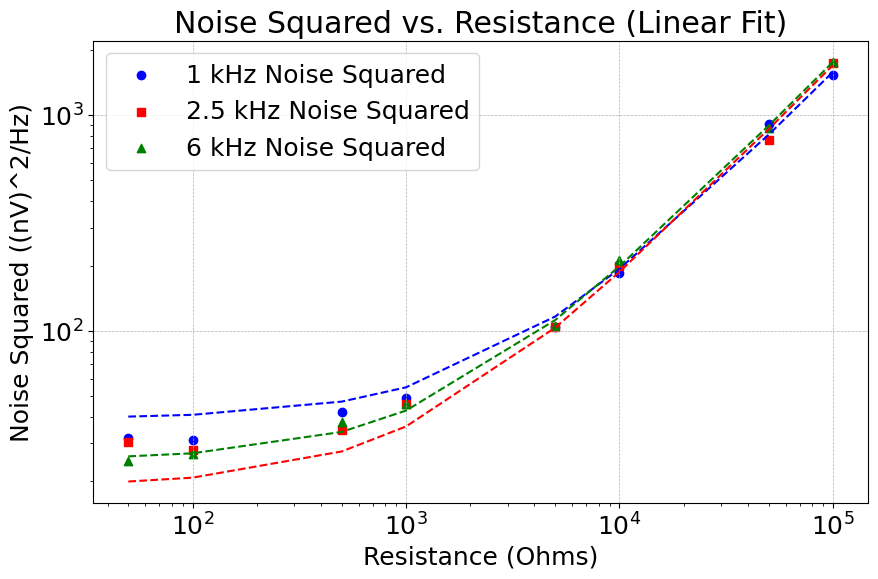

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Data
resistances = np.array([50, 100, 500, 1000, 5000, 10000, 50000, 100000])  # in Ohms

# Noise measurements (in nV/√Hz) for three frequencies
noise_1_kHz   = np.array([5.63, 5.57, 6.48, 7.00, 10.21, 13.61, 30.07, 39.18])
noise_2_5_kHz = np.array([5.53, 5.29, 5.90, 6.77, 10.19, 14.14, 27.68, 41.78])
noise_6_kHz   = np.array([4.99, 5.18, 6.15, 6.77, 10.24, 14.58, 29.48, 42.06])

# Compute noise squared (units: (nV/√Hz)^2 = nV^2/Hz)
noise_sq_1   = noise_1_kHz ** 2
noise_sq_2_5 = noise_2_5_kHz ** 2
noise_sq_6   = noise_6_kHz ** 2

# Perform linear regression on the raw (non-logarithmic) data:
slope_1, intercept_1, r_val, p_val, std_err = linregress(resistances, noise_sq_1)
slope_2_5, intercept_2_5, _, _, _           = linregress(resistances, noise_sq_2_5)
slope_6, intercept_6, _, _, _               = linregress(resistances, noise_sq_6)

# Print slopes and intercepts
print(f"1 kHz Noise Squared: slope = {slope_1:.4f}, intercept = {intercept_1:.4f}")
print(f"2.5 kHz Noise Squared: slope = {slope_2_5:.4f}, intercept = {intercept_2_5:.4f}")
print(f"6 kHz Noise Squared: slope = {slope_6:.4f}, intercept = {intercept_6:.4f}")

# Create best-fit lines for each frequency
fit_line_1   = slope_1 * resistances + intercept_1
fit_line_2_5 = slope_2_5 * resistances + intercept_2_5
fit_line_6   = slope_6 * resistances + intercept_6

# Plot the data and the best-fit lines
plt.figure(figsize=(10, 6))

plt.scatter(resistances, noise_sq_1, label="1 kHz Noise Squared", marker='o', color='blue')
plt.plot(resistances, fit_line_1, linestyle="--", color='blue')

plt.scatter(resistances, noise_sq_2_5, label="2.5 kHz Noise Squared", marker='s', color='red')
plt.plot(resistances, fit_line_2_5, linestyle="--", color='red')

plt.scatter(resistances, noise_sq_6, label="6 kHz Noise Squared", marker='^', color='green')
plt.plot(resistances, fit_line_6, linestyle="--", color='green')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Resistance (Ohms)")
plt.ylabel("Noise Squared ((nV)^2/Hz)")
plt.title("Noise Squared vs. Resistance (Linear Fit)")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


$$ slope = 4 k_b T$$

In [6]:
0.016*10**(-9)/4/293

1.3651877133105804e-14

1 kHz Noise Squared Fit: slope = 0.01571+/-0.00032 , intercept = 31.4+/-2.9
2.5 kHz Noise Squared Fit: slope = 0.01633+/-0.00033 , intercept = 27.4+/-2.8
6 kHz Noise Squared Fit: slope = 0.01728+/-0.00034 , intercept = 26.0+/-2.7


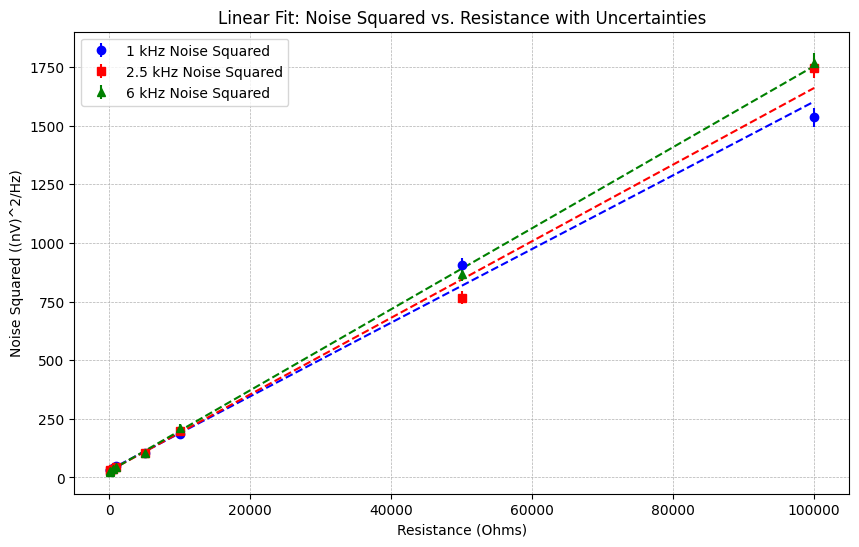

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat
import uncertainties.unumpy as unp

# Data
resistances = np.array([50, 100, 500, 1000, 5000, 10000, 50000, 100000])  # in Ohms

# Noise measurements (in nV/√Hz) for three frequencies
noise_1_kHz   = np.array([5.63, 5.57, 6.48, 7.00, 10.21, 13.61, 30.07, 39.18])
noise_2_5_kHz = np.array([5.53, 5.29, 5.90, 6.77, 10.19, 14.14, 27.68, 41.78])
noise_6_kHz   = np.array([4.99, 5.18, 6.15, 6.77, 10.24, 14.58, 29.48, 42.06])

# Each unsquared noise measurement has an uncertainty of 0.5
noise_err = 0.5

# Create ufloats for each noise measurement
noise1 = np.array([ufloat(val, noise_err) for val in noise_1_kHz])
noise2_5 = np.array([ufloat(val, noise_err) for val in noise_2_5_kHz])
noise6 = np.array([ufloat(val, noise_err) for val in noise_6_kHz])

# Compute noise squared values (the uncertainties will be propagated automatically)
noise_sq_1   = noise1**2
noise_sq_2_5 = noise2_5**2
noise_sq_6   = noise6**2

# Extract nominal values and standard deviations for noise squared
noise_sq_1_nom = unp.nominal_values(noise_sq_1)
noise_sq_1_std = unp.std_devs(noise_sq_1)

noise_sq_2_5_nom = unp.nominal_values(noise_sq_2_5)
noise_sq_2_5_std = unp.std_devs(noise_sq_2_5)

noise_sq_6_nom = unp.nominal_values(noise_sq_6)
noise_sq_6_std = unp.std_devs(noise_sq_6)

# Define a linear model for the fit: noise_sq = slope * Resistance + intercept
def linear_model(x, m, c):
    return m * x + c

# Perform weighted linear regression using curve_fit (with sigma as the standard deviations)
popt1, pcov1 = curve_fit(linear_model, resistances, noise_sq_1_nom, sigma=noise_sq_1_std, absolute_sigma=True)
popt2_5, pcov2_5 = curve_fit(linear_model, resistances, noise_sq_2_5_nom, sigma=noise_sq_2_5_std, absolute_sigma=True)
popt6, pcov6 = curve_fit(linear_model, resistances, noise_sq_6_nom, sigma=noise_sq_6_std, absolute_sigma=True)

# Create ufloats for the fit parameters (slope and intercept)
slope1    = ufloat(popt1[0], np.sqrt(pcov1[0, 0]))
intercept1= ufloat(popt1[1], np.sqrt(pcov1[1, 1]))

slope2_5    = ufloat(popt2_5[0], np.sqrt(pcov2_5[0, 0]))
intercept2_5= ufloat(popt2_5[1], np.sqrt(pcov2_5[1, 1]))

slope6    = ufloat(popt6[0], np.sqrt(pcov6[0, 0]))
intercept6= ufloat(popt6[1], np.sqrt(pcov6[1, 1]))

print("1 kHz Noise Squared Fit: slope =", slope1, ", intercept =", intercept1)
print("2.5 kHz Noise Squared Fit: slope =", slope2_5, ", intercept =", intercept2_5)
print("6 kHz Noise Squared Fit: slope =", slope6, ", intercept =", intercept6)

# Create best-fit lines using the fit parameters
fit_line_1   = linear_model(resistances, popt1[0], popt1[1])
fit_line_2_5 = linear_model(resistances, popt2_5[0], popt2_5[1])
fit_line_6   = linear_model(resistances, popt6[0], popt6[1])

# Plot the data with error bars and the fitted lines
plt.figure(figsize=(10, 6))

plt.errorbar(resistances, noise_sq_1_nom, yerr=noise_sq_1_std, fmt='o', label="1 kHz Noise Squared", color='blue')
plt.plot(resistances, fit_line_1, '--', color='blue')

plt.errorbar(resistances, noise_sq_2_5_nom, yerr=noise_sq_2_5_std, fmt='s', label="2.5 kHz Noise Squared", color='red')
plt.plot(resistances, fit_line_2_5, '--', color='red')

plt.errorbar(resistances, noise_sq_6_nom, yerr=noise_sq_6_std, fmt='^', label="6 kHz Noise Squared", color='green')
plt.plot(resistances, fit_line_6, '--', color='green')

plt.xlabel("Resistance (Ohms)")
plt.ylabel("Noise Squared ((nV)^2/Hz)")
plt.title("Linear Fit: Noise Squared vs. Resistance with Uncertainties")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


1 kHz Noise Squared Fit: slope = 0.01571+/-0.00032 , intercept = 31.4+/-2.9
2.5 kHz Noise Squared Fit: slope = 0.01633+/-0.00033 , intercept = 27.4+/-2.8
6 kHz Noise Squared Fit: slope = 0.01728+/-0.00034 , intercept = 26.0+/-2.7


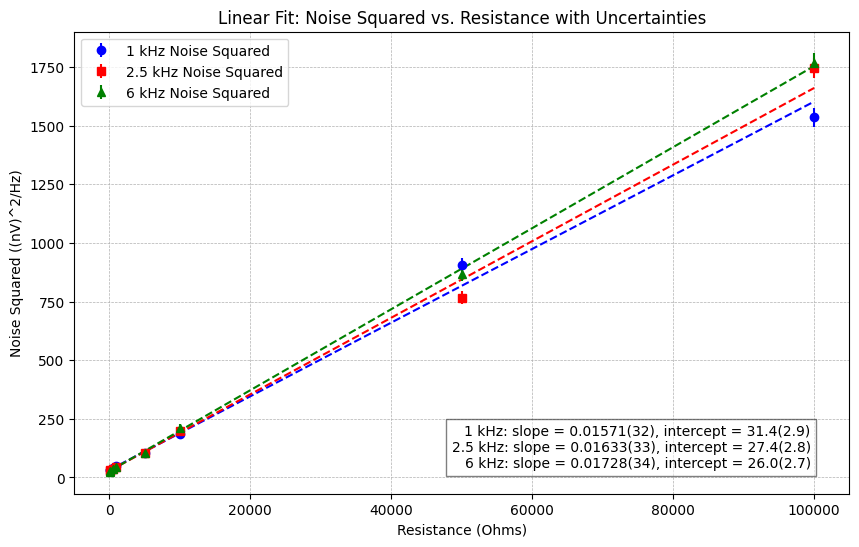

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat
import uncertainties.unumpy as unp

# Data
resistances = np.array([50, 100, 500, 1000, 5000, 10000, 50000, 100000])  # in Ohms

# Noise measurements (in nV/√Hz) for three frequencies
noise_1_kHz   = np.array([5.63, 5.57, 6.48, 7.00, 10.21, 13.61, 30.07, 39.18])
noise_2_5_kHz = np.array([5.53, 5.29, 5.90, 6.77, 10.19, 14.14, 27.68, 41.78])
noise_6_kHz   = np.array([4.99, 5.18, 6.15, 6.77, 10.24, 14.58, 29.48, 42.06])

# Each unsquared noise measurement has an uncertainty of 0.5
noise_err = 0.5

# Create ufloats for each noise measurement
noise1   = np.array([ufloat(val, noise_err) for val in noise_1_kHz])
noise2_5 = np.array([ufloat(val, noise_err) for val in noise_2_5_kHz])
noise6   = np.array([ufloat(val, noise_err) for val in noise_6_kHz])

# Compute noise squared values (the uncertainties will be propagated automatically)
noise_sq_1   = noise1**2
noise_sq_2_5 = noise2_5**2
noise_sq_6   = noise6**2

# Extract nominal values and standard deviations for noise squared
noise_sq_1_nom = unp.nominal_values(noise_sq_1)
noise_sq_1_std = unp.std_devs(noise_sq_1)

noise_sq_2_5_nom = unp.nominal_values(noise_sq_2_5)
noise_sq_2_5_std = unp.std_devs(noise_sq_2_5)

noise_sq_6_nom = unp.nominal_values(noise_sq_6)
noise_sq_6_std = unp.std_devs(noise_sq_6)

# Define a linear model for the fit: noise_sq = slope * Resistance + intercept
def linear_model(x, m, c):
    return m * x + c

# Perform weighted linear regression using curve_fit (with sigma as the standard deviations)
popt1, pcov1    = curve_fit(linear_model, resistances, noise_sq_1_nom, sigma=noise_sq_1_std, absolute_sigma=True)
popt2_5, pcov2_5 = curve_fit(linear_model, resistances, noise_sq_2_5_nom, sigma=noise_sq_2_5_std, absolute_sigma=True)
popt6, pcov6    = curve_fit(linear_model, resistances, noise_sq_6_nom, sigma=noise_sq_6_std, absolute_sigma=True)

# Create ufloats for the fit parameters (slope and intercept)
slope1      = ufloat(popt1[0], np.sqrt(pcov1[0, 0]))
intercept1  = ufloat(popt1[1], np.sqrt(pcov1[1, 1]))

slope2_5      = ufloat(popt2_5[0], np.sqrt(pcov2_5[0, 0]))
intercept2_5  = ufloat(popt2_5[1], np.sqrt(pcov2_5[1, 1]))

slope6      = ufloat(popt6[0], np.sqrt(pcov6[0, 0]))
intercept6  = ufloat(popt6[1], np.sqrt(pcov6[1, 1]))

print("1 kHz Noise Squared Fit: slope =", slope1, ", intercept =", intercept1)
print("2.5 kHz Noise Squared Fit: slope =", slope2_5, ", intercept =", intercept2_5)
print("6 kHz Noise Squared Fit: slope =", slope6, ", intercept =", intercept6)

# Create best-fit lines using the fit parameters
fit_line_1   = linear_model(resistances, popt1[0], popt1[1])
fit_line_2_5 = linear_model(resistances, popt2_5[0], popt2_5[1])
fit_line_6   = linear_model(resistances, popt6[0], popt6[1])

# Plot the data with error bars and the fitted lines
plt.figure(figsize=(10, 6))

plt.errorbar(resistances, noise_sq_1_nom, yerr=noise_sq_1_std, fmt='o', label="1 kHz Noise Squared", color='blue')
plt.plot(resistances, fit_line_1, '--', color='blue')

plt.errorbar(resistances, noise_sq_2_5_nom, yerr=noise_sq_2_5_std, fmt='s', label="2.5 kHz Noise Squared", color='red')
plt.plot(resistances, fit_line_2_5, '--', color='red')

plt.errorbar(resistances, noise_sq_6_nom, yerr=noise_sq_6_std, fmt='^', label="6 kHz Noise Squared", color='green')
plt.plot(resistances, fit_line_6, '--', color='green')

plt.xlabel("Resistance (Ohms)")
plt.ylabel("Noise Squared ((nV)^2/Hz)")
plt.title("Linear Fit: Noise Squared vs. Resistance with Uncertainties")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Create a multi-line string for the fit parameters using value(uncertainty) formatting.
textstr = '\n'.join((
    '1 kHz: slope = ' + f'{slope1:S}' + ', intercept = ' + f'{intercept1:S}',
    '2.5 kHz: slope = ' + f'{slope2_5:S}' + ', intercept = ' + f'{intercept2_5:S}',
    '6 kHz: slope = ' + f'{slope6:S}' + ', intercept = ' + f'{intercept6:S}'
))

# Add the text box to the bottom right of the graph.
plt.text(0.95, 0.05, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

plt.show()


1 kHz Noise Squared Fit: slope = 0.01571+/-0.00032 , intercept = 31.4+/-2.9
2.5 kHz Noise Squared Fit: slope = 0.01633+/-0.00033 , intercept = 27.4+/-2.8
6 kHz Noise Squared Fit: slope = 0.01728+/-0.00034 , intercept = 26.0+/-2.7
k_1 = (1.341+/-0.028)e-23
k_2_5 = (1.394+/-0.028)e-23
k_6 = (1.475+/-0.029)e-23


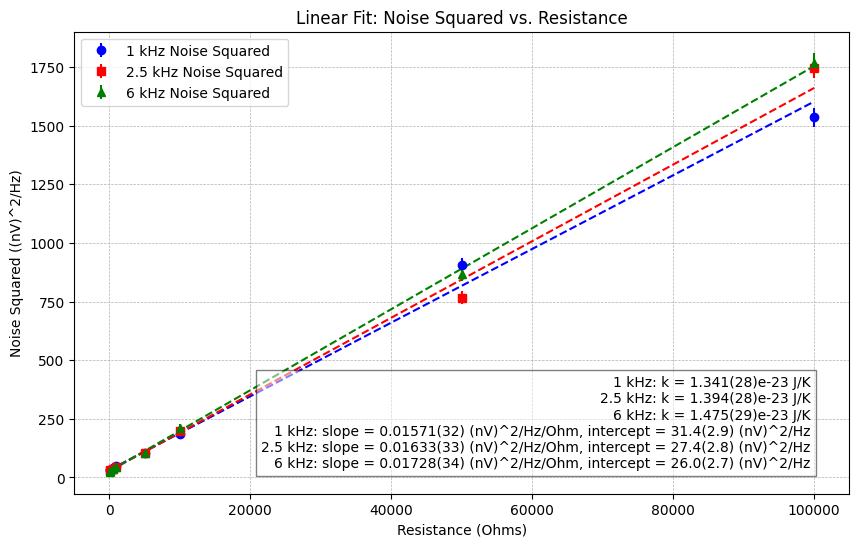

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from uncertainties import ufloat
import uncertainties.unumpy as unp

# Data
resistances = np.array([50, 100, 500, 1000, 5000, 10000, 50000, 100000])  # in Ohms

# Noise measurements (in nV/√Hz) for three frequencies
noise_1_kHz   = np.array([5.63, 5.57, 6.48, 7.00, 10.21, 13.61, 30.07, 39.18])
noise_2_5_kHz = np.array([5.53, 5.29, 5.90, 6.77, 10.19, 14.14, 27.68, 41.78])
noise_6_kHz   = np.array([4.99, 5.18, 6.15, 6.77, 10.24, 14.58, 29.48, 42.06])

# Each unsquared noise measurement has an uncertainty of 0.5
noise_err = 0.5

# Create ufloats for each noise measurement
noise1   = np.array([ufloat(val, noise_err) for val in noise_1_kHz])
noise2_5 = np.array([ufloat(val, noise_err) for val in noise_2_5_kHz])
noise6   = np.array([ufloat(val, noise_err) for val in noise_6_kHz])

# Compute noise squared values (the uncertainties will be propagated automatically)
noise_sq_1   = noise1 ** 2
noise_sq_2_5 = noise2_5 ** 2
noise_sq_6   = noise6 ** 2

# Extract nominal values and standard deviations for noise squared
noise_sq_1_nom = unp.nominal_values(noise_sq_1)
noise_sq_1_std = unp.std_devs(noise_sq_1)

noise_sq_2_5_nom = unp.nominal_values(noise_sq_2_5)
noise_sq_2_5_std = unp.std_devs(noise_sq_2_5)

noise_sq_6_nom = unp.nominal_values(noise_sq_6)
noise_sq_6_std = unp.std_devs(noise_sq_6)

# Define a linear model for the fit: noise_sq = slope * Resistance + intercept
def linear_model(x, m, c):
    return m * x + c

# Perform weighted linear regression using curve_fit (with sigma as the standard deviations)
popt1, pcov1    = curve_fit(linear_model, resistances, noise_sq_1_nom,
                             sigma=noise_sq_1_std, absolute_sigma=True)
popt2_5, pcov2_5 = curve_fit(linear_model, resistances, noise_sq_2_5_nom,
                             sigma=noise_sq_2_5_std, absolute_sigma=True)
popt6, pcov6    = curve_fit(linear_model, resistances, noise_sq_6_nom,
                             sigma=noise_sq_6_std, absolute_sigma=True)

# Create ufloats for the fit parameters (slope and intercept)
slope1     = ufloat(popt1[0], np.sqrt(pcov1[0, 0]))
intercept1 = ufloat(popt1[1], np.sqrt(pcov1[1, 1]))

slope2_5     = ufloat(popt2_5[0], np.sqrt(pcov2_5[0, 0]))
intercept2_5 = ufloat(popt2_5[1], np.sqrt(pcov2_5[1, 1]))

slope6     = ufloat(popt6[0], np.sqrt(pcov6[0, 0]))
intercept6 = ufloat(popt6[1], np.sqrt(pcov6[1, 1]))

print("1 kHz Noise Squared Fit: slope =", slope1, ", intercept =", intercept1)
print("2.5 kHz Noise Squared Fit: slope =", slope2_5, ", intercept =", intercept2_5)
print("6 kHz Noise Squared Fit: slope =", slope6, ", intercept =", intercept6)

# Conversion: divide by (4*293) and multiply by 1e-9
# This is equivalent to: conversion_factor = 1e-18 / (4 * 293)
conversion_factor = 1e-18 / (4 * 293)
k_1   = slope1 * conversion_factor
k_2_5 = slope2_5 * conversion_factor
k_6   = slope6 * conversion_factor

print("k_1 =", k_1)
print("k_2_5 =", k_2_5)
print("k_6 =", k_6)

# Create best-fit lines using the fit parameters
fit_line_1   = linear_model(resistances, popt1[0], popt1[1])
fit_line_2_5 = linear_model(resistances, popt2_5[0], popt2_5[1])
fit_line_6   = linear_model(resistances, popt6[0], popt6[1])

# Plot the data with error bars and the fitted lines
plt.figure(figsize=(10, 6))

plt.errorbar(resistances, noise_sq_1_nom, yerr=noise_sq_1_std,
             fmt='o', label="1 kHz Noise Squared", color='blue')
plt.plot(resistances, fit_line_1, '--', color='blue')

plt.errorbar(resistances, noise_sq_2_5_nom, yerr=noise_sq_2_5_std,
             fmt='s', label="2.5 kHz Noise Squared", color='red')
plt.plot(resistances, fit_line_2_5, '--', color='red')

plt.errorbar(resistances, noise_sq_6_nom, yerr=noise_sq_6_std,
             fmt='^', label="6 kHz Noise Squared", color='green')
plt.plot(resistances, fit_line_6, '--', color='green')

plt.xlabel("Resistance (Ohms)")
plt.ylabel("Noise Squared ((nV)^2/Hz)")
plt.title("Linear Fit: Noise Squared vs. Resistance")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Create a multi-line string for the k values using value(uncertainty) formatting.
textstr = '\n'.join((
    '1 kHz: k = ' + f'{k_1:S}' + ' J/K',
    '2.5 kHz: k = ' + f'{k_2_5:S}'+ ' J/K',
    '6 kHz: k = ' + f'{k_6:S}'+ ' J/K',
    '1 kHz: slope = ' + f'{slope1:S}' + ' (nV)^2/Hz/Ohm' + ', intercept = ' + f'{intercept1:S}'+ ' (nV)^2/Hz',
    '2.5 kHz: slope = ' + f'{slope2_5:S}' + ' (nV)^2/Hz/Ohm'+ ', intercept = ' + f'{intercept2_5:S}'+ ' (nV)^2/Hz',
    '6 kHz: slope = ' + f'{slope6:S}' + ' (nV)^2/Hz/Ohm'+ ', intercept = ' + f'{intercept6:S}'+ ' (nV)^2/Hz'
    
))

# Add the text box to the bottom right of the graph.
plt.text(0.95, 0.05, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

plt.show()


In [8]:
# Conversion: divide by (4*293) and multiply by 1e-9
conversion_factor = 1e-18 / (4 * 293)

k_1   = slope1 * conversion_factor
k_2_5 = slope2_5 * conversion_factor
k_6   = slope6 * conversion_factor

print("k_1 =", k_1)
print("k_2_5 =", k_2_5)
print("k_6 =", k_6)


k_1 = (1.341+/-0.028)e-23
k_2_5 = (1.394+/-0.028)e-23
k_6 = (1.475+/-0.029)e-23


In [9]:
# Compute the average of the three k-values
average_k = (k_1 + k_2_5 + k_6) / 3

# Print the average with its uncertainty
print("Average k =", average_k)


Average k = (1.403+/-0.016)e-23


In [10]:
popt1

array([1.57145577e-02, 3.14377303e+01])

In [18]:
403-16

387

1 kHz Noise Squared Fit: slope = 0.01571+/-0.00032 , intercept = 31.4+/-2.9
2.5 kHz Noise Squared Fit: slope = 0.01633+/-0.00033 , intercept = 27.4+/-2.8
6 kHz Noise Squared Fit: slope = 0.01728+/-0.00034 , intercept = 26.0+/-2.7
k_1 = (1.341+/-0.028)e-23
k_2_5 = (1.394+/-0.028)e-23
k_6 = (1.475+/-0.029)e-23


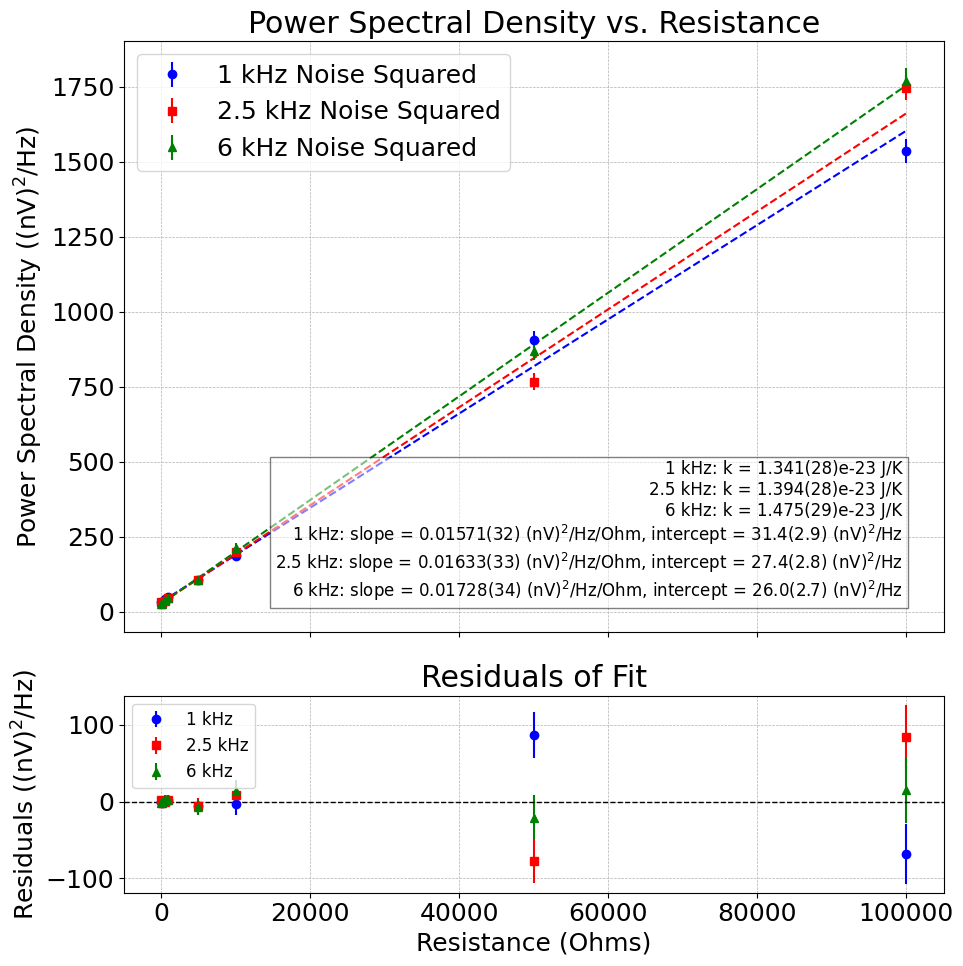

In [95]:
# Data
resistances = np.array([50, 100, 500, 1000, 5000, 10000, 50000, 100000])  # in Ohms

# Noise measurements (in nV/√Hz) for three frequencies
noise_1_kHz   = np.array([5.63, 5.57, 6.48, 7.00, 10.21, 13.61, 30.07, 39.18])
noise_2_5_kHz = np.array([5.53, 5.29, 5.90, 6.77, 10.19, 14.14, 27.68, 41.78])
noise_6_kHz   = np.array([4.99, 5.18, 6.15, 6.77, 10.24, 14.58, 29.48, 42.06])

# Each unsquared noise measurement has an uncertainty of 0.5
noise_err = 0.5

# Create ufloats for each noise measurement
noise1   = np.array([ufloat(val, noise_err) for val in noise_1_kHz])
noise2_5 = np.array([ufloat(val, noise_err) for val in noise_2_5_kHz])
noise6   = np.array([ufloat(val, noise_err) for val in noise_6_kHz])

# Compute noise squared values (the uncertainties are propagated automatically)
noise_sq_1   = noise1 ** 2
noise_sq_2_5 = noise2_5 ** 2
noise_sq_6   = noise6 ** 2

# Extract nominal values and standard deviations for noise squared
noise_sq_1_nom = unp.nominal_values(noise_sq_1)
noise_sq_1_std = unp.std_devs(noise_sq_1)

noise_sq_2_5_nom = unp.nominal_values(noise_sq_2_5)
noise_sq_2_5_std = unp.std_devs(noise_sq_2_5)

noise_sq_6_nom = unp.nominal_values(noise_sq_6)
noise_sq_6_std = unp.std_devs(noise_sq_6)

# Define a linear model for the fit: noise_sq = slope * Resistance + intercept
def linear_model(x, m, c):
    return m * x + c

# Perform weighted linear regression using curve_fit
popt1, pcov1    = curve_fit(linear_model, resistances, noise_sq_1_nom,
                             sigma=noise_sq_1_std, absolute_sigma=True)
popt2_5, pcov2_5 = curve_fit(linear_model, resistances, noise_sq_2_5_nom,
                             sigma=noise_sq_2_5_std, absolute_sigma=True)
popt6, pcov6    = curve_fit(linear_model, resistances, noise_sq_6_nom,
                             sigma=noise_sq_6_std, absolute_sigma=True)

# Create ufloats for the fit parameters (slope and intercept)
slope1     = ufloat(popt1[0], np.sqrt(pcov1[0, 0]))
intercept1 = ufloat(popt1[1], np.sqrt(pcov1[1, 1]))

slope2_5     = ufloat(popt2_5[0], np.sqrt(pcov2_5[0, 0]))
intercept2_5 = ufloat(popt2_5[1], np.sqrt(pcov2_5[1, 1]))

slope6     = ufloat(popt6[0], np.sqrt(pcov6[0, 0]))
intercept6 = ufloat(popt6[1], np.sqrt(pcov6[1, 1]))

print("1 kHz Noise Squared Fit: slope =", slope1, ", intercept =", intercept1)
print("2.5 kHz Noise Squared Fit: slope =", slope2_5, ", intercept =", intercept2_5)
print("6 kHz Noise Squared Fit: slope =", slope6, ", intercept =", intercept6)

# Conversion: divide by (4*293) and multiply by 1e-9
conversion_factor = 1e-18 / (4 * 293)
k_1   = slope1 * conversion_factor
k_2_5 = slope2_5 * conversion_factor
k_6   = slope6 * conversion_factor

print("k_1 =", k_1)
print("k_2_5 =", k_2_5)
print("k_6 =", k_6)

# Create best-fit lines using the fit parameters
fit_line_1   = linear_model(resistances, popt1[0], popt1[1])
fit_line_2_5 = linear_model(resistances, popt2_5[0], popt2_5[1])
fit_line_6   = linear_model(resistances, popt6[0], popt6[1])

# Calculate residuals for each frequency
resid_1   = noise_sq_1_nom - fit_line_1
resid_2_5 = noise_sq_2_5_nom - fit_line_2_5
resid_6   = noise_sq_6_nom - fit_line_6

# Create a figure with two subplots with different height ratios
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True,
                                gridspec_kw={'height_ratios': [3, 1]})

# Upper subplot: data with error bars and fitted lines
ax1.errorbar(resistances, noise_sq_1_nom, yerr=noise_sq_1_std,
             fmt='o', label="1 kHz Noise Squared", color='blue')
ax1.plot(resistances, fit_line_1, '--', color='blue')

ax1.errorbar(resistances, noise_sq_2_5_nom, yerr=noise_sq_2_5_std,
             fmt='s', label="2.5 kHz Noise Squared", color='red')
ax1.plot(resistances, fit_line_2_5, '--', color='red')

ax1.errorbar(resistances, noise_sq_6_nom, yerr=noise_sq_6_std,
             fmt='^', label="6 kHz Noise Squared", color='green')
ax1.plot(resistances, fit_line_6, '--', color='green')

ax1.set_ylabel("Power Spectral Density ((nV)$^2$/Hz)")
ax1.set_title("Power Spectral Density vs. Resistance")
ax1.legend()
ax1.grid(True, linestyle='--', linewidth=0.5)

# Add a text box with k values and fit parameters in the upper plot
textstr = '\n'.join((
    '1 kHz: k = ' + f'{k_1:S}' + ' J/K',
    '2.5 kHz: k = ' + f'{k_2_5:S}' + ' J/K',
    '6 kHz: k = ' + f'{k_6:S}' + ' J/K',
    '1 kHz: slope = ' + f'{slope1:S}' + ' (nV)$^2$/Hz/Ohm' + ', intercept = ' + f'{intercept1:S}' + ' (nV)$^2$/Hz',
    '2.5 kHz: slope = ' + f'{slope2_5:S}' + ' (nV)$^2$/Hz/Ohm' + ', intercept = ' + f'{intercept2_5:S}' + ' (nV)$^2$/Hz',
    '6 kHz: slope = ' + f'{slope6:S}' + ' (nV)$^2$/Hz/Ohm' + ', intercept = ' + f'{intercept6:S}' + ' (nV)$^2$/Hz'
))
ax1.text(0.95, 0.05, textstr, transform=ax1.transAxes,
         fontsize=12, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5))

# Lower subplot: residuals with error bars
ax2.errorbar(resistances, resid_1, yerr=noise_sq_1_std, fmt='o', label="1 kHz", color='blue')
ax2.errorbar(resistances, resid_2_5, yerr=noise_sq_2_5_std, fmt='s', label="2.5 kHz", color='red')
ax2.errorbar(resistances, resid_6, yerr=noise_sq_6_std, fmt='^', label="6 kHz", color='green')

# Draw a horizontal line at y = 0
ax2.axhline(0, color='black', linestyle='--', linewidth=1)

ax2.set_xlabel("Resistance (Ohms)")
ax2.set_ylabel("Residuals ((nV)$^2$/Hz)")
ax2.set_title("Residuals of Fit")
ax2.legend()
ax2.grid(True, linestyle='--', linewidth=0.5)
ax2.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.rcParams.update({'font.size': 18})
plt.show()

# Response time

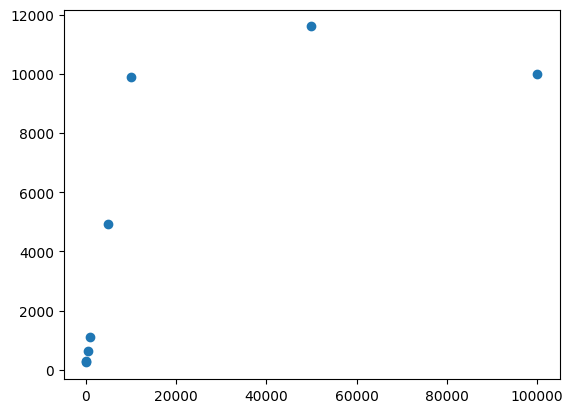

In [28]:
resistances = np.array([50, 100, 500, 1000, 5000, 10000, 50000, 100000]) # in Ohms
rise_times = np.array([250, 295, 650, 1100, 4930, 9900, 11600, 10000]) # in nanoseconds
plt.scatter(resistances, rise_times)

# Shot Noise

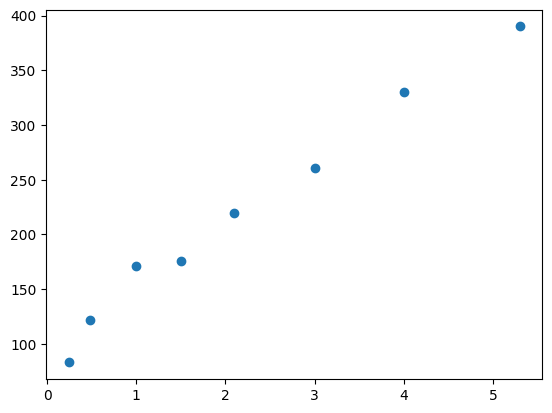

In [29]:
voltages = [5.3, 3.0, 2.1, 1.0, 0.48, 0.24, 1.5, 4.0]
noises = [390, 261, 220, 171, 122, 83, 176, 330] # in PSD
plt.scatter(voltages, noises)

Slope = (2.85+/-0.17)e+04
Intercept = (-5+/-5)e+03


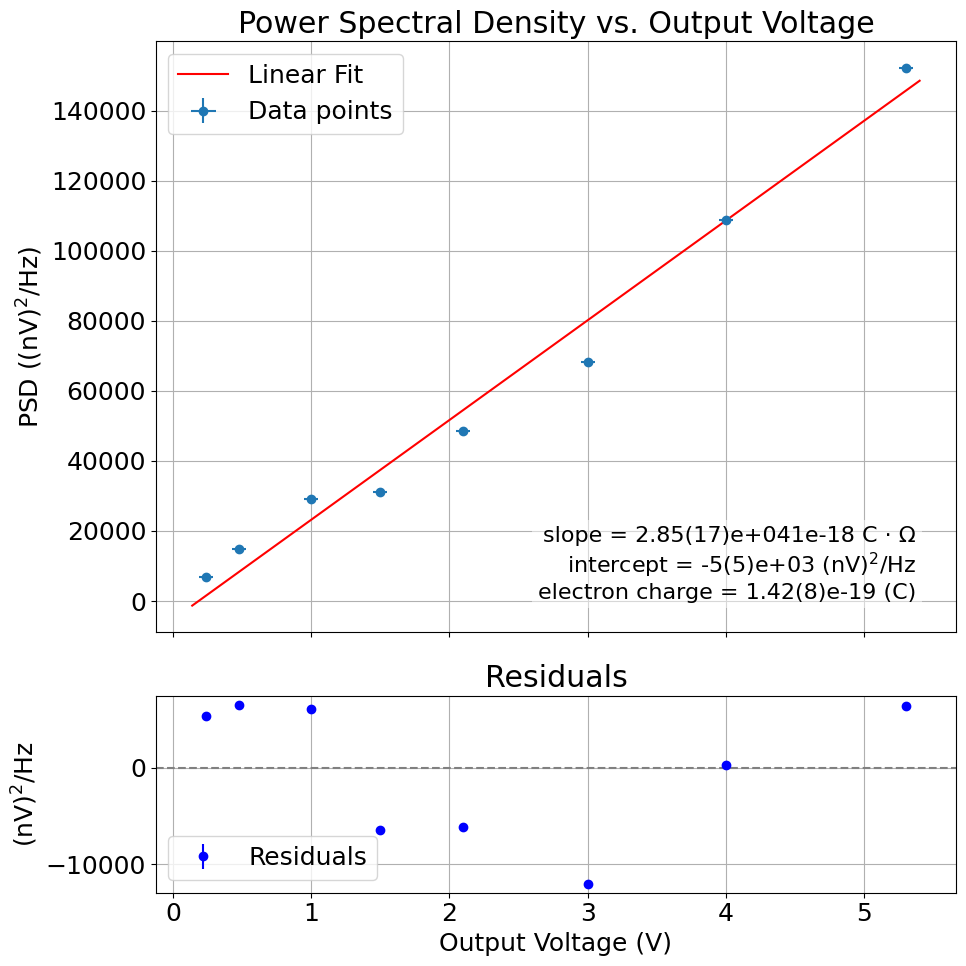

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import ODR, Model, RealData
from uncertainties import ufloat

# Define the data
voltages = np.array([5.3, 3.0, 2.1, 1.0, 0.48, 0.24, 1.5, 4.0]) # in Volts
noises   = np.array([390, 261, 220, 171, 122, 83, 176, 330])**2

# Define the linear function for fitting: y = m*x + b
def linear(B, x):
    m, b = B
    return m * x + b

# Create a Model for ODR
model = Model(linear)

# Prepare the data for ODR including uncertainties:
# Note: sx=0.05 V and sy=1.0 (nV)^2/Hz are the estimated uncertainties for each data point 
data = RealData(voltages, noises, sx=0.05, sy=1.0)

# Provide an initial guess for the parameters
init_slope = (noises.max() - noises.min()) / (voltages.max() - voltages.min())
init_intercept = noises.min() - init_slope * voltages.min()
odr = ODR(data, model, beta0=[init_slope, init_intercept])

# Run the ODR
output = odr.run()

# Extract slope and intercept with their uncertainties
slope_value = output.beta[0]
intercept_value = output.beta[1]
slope_error = output.sd_beta[0]
intercept_error = output.sd_beta[1]

# Create ufloats for slope and intercept
slope_uf = ufloat(slope_value, slope_error)
intercept_uf = ufloat(intercept_value, intercept_error)

print("Slope =", slope_uf)
print("Intercept =", intercept_uf)

# Create a larger figure with two subplots:
# - The upper subplot (ax1) shows the data and the best-fit line.
# - The lower subplot (ax2) shows the residuals.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10),
                                gridspec_kw={'height_ratios': [3, 1]},
                                sharex=True)

# ---------------------------
# Main plot: Data and fit
# ---------------------------
ax1.errorbar(voltages, noises, xerr=0.05, yerr=1.0, fmt='o', label='Data points')

# Create x values for the best-fit line
x_fit = np.linspace(voltages.min() - 0.1, voltages.max() + 0.1, 100)
y_fit = linear(output.beta, x_fit)

# Plot the best-fit line
ax1.plot(x_fit, y_fit, 'r-', label='Linear Fit')

# Label the y-axis for the main plot
ax1.set_ylabel("PSD ((nV)$^2$/Hz)")

# Prepare the text string with the fit parameters.

# slope = 2*q*R_L
# conversion factor = 2*R_L + conversion from nV^2 to V^2
R_L = 100000 # Ohms

conversion = 2*R_L*1e18
q_uf = slope_uf/conversion
# Using Unicode for the multiplication dot (·) and Omega (Ω)
textstr = '\n'.join((
    f'slope = {slope_uf:S}1e-18 C \u00B7 \u03A9',
    f'intercept = {intercept_uf:S} (nV)$^2$/Hz',
    f'electron charge = {q_uf:S} (C)'
))


# Place the text box in the bottom right of ax1.
ax1.text(0.95, 0.05, textstr, transform=ax1.transAxes,
         fontsize=16, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

ax1.legend()
ax1.grid(True)
ax1.set_title("Power Spectral Density vs. Output Voltage")

# ---------------------------
# Residuals plot
# ---------------------------
# Calculate the predicted values at the measured voltages and then the residuals.
y_pred = linear(output.beta, voltages)
residuals = noises - y_pred

# Plot the residuals with error bars (using the same y uncertainties)
ax2.errorbar(voltages, residuals, yerr=1.0, fmt='o', color='blue', label='Residuals')
ax2.axhline(0, color='gray', linestyle='--')
ax2.set_xlabel("Output Voltage (V)")
ax2.set_ylabel("(nV)$^2$/Hz")
ax2.legend()
ax2.set_title("Residuals")
ax2.grid(True)


plt.tight_layout()
plt.rcParams.update({'font.size': 18})
plt.show()

In [39]:
58/200000

0.00029

In [33]:
0.00029 * 1e-18

2.9e-22

In [35]:
58/4

14.5

In [38]:
14.5*1e-18

1.45e-17

In [40]:
0.00029 * 1e-18

2.9e-22

In [47]:
slope_uf/200000 *1e-18

2.9296249644320905e-22+/-1.4953786110319652e-23

In [50]:
slope_uf/200 *1e-18

2.9296249644320906e-19+/-1.495378611031965e-20

Slope = (2.82+/-0.17)e+04
Intercept = (-5+/-5)e+03


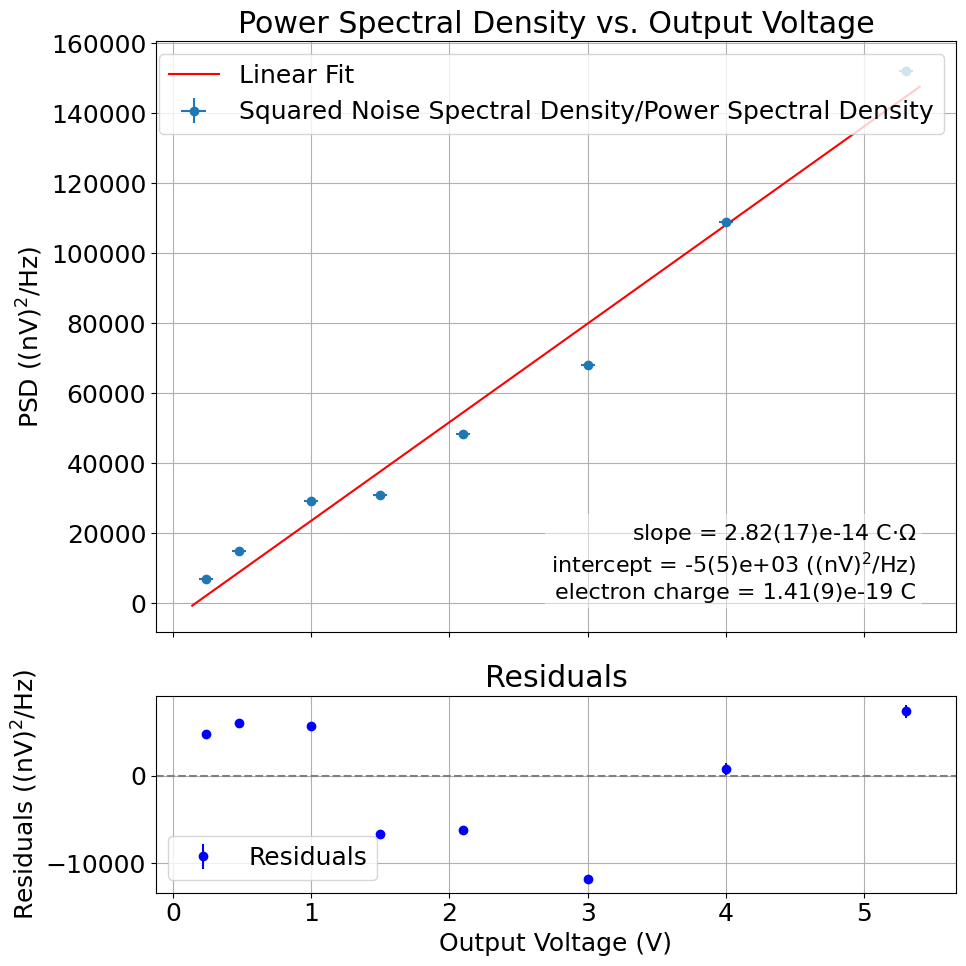

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import ODR, Model, RealData
from uncertainties import ufloat

# Define the data
voltages = np.array([5.3, 3.0, 2.1, 1.0, 0.48, 0.24, 1.5, 4.0])  # in Volts
noises   = np.array([390, 261, 220, 171, 122, 83, 176, 330])       # in (nV)^2/Hz

# Square the y values
noises_sq = noises**2  
# Propagate uncertainties: if uncertainty in noises is 1.0, then:
noise_sq_std = 2 * noises * 1.0

# Define the linear function for fitting: y = m*x + b
def linear(B, x):
    m, b = B
    return m * x + b

# Create a Model for ODR
model = Model(linear)

# Prepare the data for ODR including uncertainties:
# Now we use the squared y values and their propagated uncertainties.
data = RealData(voltages, noises_sq, sx=0.05, sy=noise_sq_std)

# Provide an initial guess for the parameters
init_slope = (noises_sq.max() - noises_sq.min()) / (voltages.max() - voltages.min())
init_intercept = noises_sq.min() - init_slope * voltages.min()
odr = ODR(data, model, beta0=[init_slope, init_intercept])

# Run the ODR
output = odr.run()

# Extract slope and intercept with their uncertainties
slope_value = output.beta[0]
intercept_value = output.beta[1]
slope_error = output.sd_beta[0]
intercept_error = output.sd_beta[1]

# Create ufloats for slope and intercept
slope_uf = ufloat(slope_value, slope_error)
intercept_uf = ufloat(intercept_value, intercept_error)

print("Slope =", slope_uf)
print("Intercept =", intercept_uf)

# Create a larger figure with two subplots:
# - The upper subplot (ax1) shows the squared data and the best-fit line.
# - The lower subplot (ax2) shows the residuals.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10),
                                gridspec_kw={'height_ratios': [3, 1]},
                                sharex=True)

# ---------------------------
# Main plot: Squared data and linear fit
# ---------------------------
ax1.errorbar(voltages, noises_sq, xerr=0.05, yerr=noise_sq_std,
             fmt='o', label='Squared Noise Spectral Density/Power Spectral Density')

# Create x values for the best-fit line
x_fit = np.linspace(voltages.min() - 0.1, voltages.max() + 0.1, 100)
y_fit = linear(output.beta, x_fit)

# Plot the best-fit line
ax1.plot(x_fit, y_fit, 'r-', label='Linear Fit')

# Label the y-axis (the squared PSD has units ((nV)^2/Hz)^2 = (nV)^4/Hz^2)
ax1.set_ylabel("PSD ((nV)$^2$/Hz)")
ax1.set_title("Power Spectral Density vs. Output Voltage")

conversion=2*100000*1e18
# Prepare the text string with the fit parameters
textstr = '\n'.join((
    f'slope = {slope_uf*1e-18:S} C$\cdot \Omega$',
    f'intercept = {intercept_uf:S} ((nV)$^2$/Hz)',
    f'electron charge = {slope_uf/conversion:S} C'
))
# Place the text box in the bottom right of ax1
ax1.text(0.95, 0.05, textstr, transform=ax1.transAxes,
         fontsize=16, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

ax1.legend()
ax1.grid(True)

# ---------------------------
# Residuals plot
# ---------------------------
# Calculate predicted squared values and then the residuals.
y_pred = linear(output.beta, voltages)
residuals = noises_sq - y_pred

ax2.errorbar(voltages, residuals, yerr=noise_sq_std, fmt='o',
             color='blue', label='Residuals')
ax2.axhline(0, color='gray', linestyle='--')
ax2.set_xlabel("Output Voltage (V)")
ax2.set_ylabel("Residuals ((nV)$^2$/Hz)")
ax2.set_title("Residuals")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [86]:
28200/2/100000*1e-18

1.4099999999999999e-19